# 逻辑斯蒂回归

参考：https://github.com/fengdu78/lihang-code

逻辑斯谛回归(LR)是经典的分类方法

1．逻辑斯谛回归模型是由以下条件概率分布表示的分类模型。逻辑斯谛回归模型可以用于二类或多类分类。

$$P(Y=k | x)=\frac{\exp \left(w_{k} \cdot x\right)}{1+\sum_{k=1}^{K-1} \exp \left(w_{k} \cdot x\right)}, \quad k=1,2, \cdots, K-1$$

$$P(Y=K | x)=\frac{1}{1+\sum_{k=1}^{K-1} \exp \left(w_{k} \cdot x\right)}$$
这里，$x$为输入特征，$w$为特征的权值。

逻辑斯谛回归模型源自逻辑斯谛分布，其分布函数$F(x)$是$S$形函数。逻辑斯谛回归模型是由输入的线性函数表示的输出的对数几率模型。

2．最大熵模型是由以下条件概率分布表示的分类模型。最大熵模型也可以用于二类或多类分类。

$$P_{w}(y | x)=\frac{1}{Z_{w}(x)} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right)$$
$$Z_{w}(x)=\sum_{y} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right)$$

其中，$Z_w(x)$是规范化因子，$f_i$为特征函数，$w_i$为特征的权值。

3．最大熵模型可以由最大熵原理推导得出。最大熵原理是概率模型学习或估计的一个准则。最大熵原理认为在所有可能的概率模型（分布）的集合中，熵最大的模型是最好的模型。

最大熵原理应用到分类模型的学习中，有以下约束最优化问题：

$$\min -H(P)=\sum_{x, y} \tilde{P}(x) P(y | x) \log P(y | x)$$

$$s.t.  \quad P\left(f_{i}\right)-\tilde{P}\left(f_{i}\right)=0, \quad i=1,2, \cdots, n$$
 
 $$\sum_{y} P(y | x)=1$$
 
求解此最优化问题的对偶问题得到最大熵模型。

4．逻辑斯谛回归模型与最大熵模型都属于对数线性模型。

5．逻辑斯谛回归模型及最大熵模型学习一般采用极大似然估计，或正则化的极大似然估计。逻辑斯谛回归模型及最大熵模型学习可以形式化为无约束最优化问题。求解该最优化问题的算法有改进的迭代尺度法、梯度下降法、拟牛顿法。



回归模型：$f(x) = \frac{1}{1+e^{-wx}}$

其中wx线性函数：$wx =w_0\cdot x_0 + w_1\cdot x_1 + w_2\cdot x_2 +...+w_n\cdot x_n,(x_0=1)$


In [13]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## 获取训练数据

In [14]:
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    # 取100行数据，sepal length , sepal width 和 label 列
    data = np.array(df.iloc[:100, [0,1,-1]])
    # print(data)
    return data[:,:2], data[:,-1]

In [51]:
# 获取数据和标签
X, y = create_data()
# 使用 sklearn 的train_test_split方法，对数据进行随机划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [52]:
print(X_train[:5])

[[6.1 3. ]
 [5.1 3.3]
 [4.7 3.2]
 [5.1 3.4]
 [5.7 2.8]]


## LogisticRegression 模型

In [60]:
class LogisticRegressionClassifier():
    def __init__(self, max_iter=200, learning_rate=0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        
    def sigmoid(seld, x):
        return 1 / (1 + exp(-x))
    
    def data_matrix(self, X):
        """
        给训练鼠每一行增加一列 1
        :param X: 训练数据
        """
        data_mat = []
        for d in X:
            data_mat.append([1.0, *d])
        return np.array(data_mat)
    
    def fit(self, X, y):
        # 增加第一列全1
        data_mat = self.data_matrix(X)
        self.weights = np.zeros(len(data_mat[0]), dtype=np.float32)
        
        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                # 随机梯度下降
                # 统计学习方法中 对 6.1.3 对数似然函数求导为 xi * yi - (exp(w * xi) * xi) / (1 + exp(w * xi))
                # 似然函数最大，梯度下降变为梯度上升
                xi = data_mat[i]
                yi = y[i]
                wx = np.dot(xi, self.weights)
                self.weights += self.learning_rate * (xi * yi - (exp(wx) * xi) / (1 + exp(wx)))
                
                # 梯度求导方法也可以使用下面的方式, 没有做 exp 变换，求导所得
#                 result = self.sigmoid(np.dot(data_mat[i], self.weights))
#                 error = y[i] - result
#                 self.weights += self.learning_rate * error * [data_mat[i]
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(
        self.learning_rate, self.max_iter))
    def predict(self, test_data):
        """
        根据测试集返回预测结果
        :param test_data:
        :return: array
        """
        all_prob = self.predict_prob(test_data)
        result_label = [1 if i > 0.5 else 0 for i in all_prob]
        
        return result_label
        
    def predict_prob(self, test_data):
        """
        根据测试集返回预测概率
        :param test_data:
        :return: array
        """
        all_prob = np.zeros(len(test_data))
        test_data = self.data_matrix(test_data)
        
        for i in range(len(test_data)):
            all_prob[i] = self.sigmoid(np.dot(self.weights, test_data[i]))
            
        return all_prob
    
    def score(self, test_data, test_label):
        """
        :param test_data: 测试数据
        :param test_label: 测试数据标签
        :return:
        """
        predict_label = self.predict(test_data)

        error_cnt = 0
        for k in range(len(predict_label)):
            # 记录误分类数
            if predict_label[k] != test_label[k]:
                error_cnt += 1
        # 正确率 = 1 - 错误分类样本数 / 总样本数
        print('accuracy: ', 1 - error_cnt / len(predict_label))

In [61]:
lr_clf = LogisticRegressionClassifier()
lr_clf.fit(X_train, y_train)

LogisticRegression Model(learning_rate=0.01,max_iter=200)


In [62]:
lr_clf.score(X_test, y_test)

accuracy:  1.0


## 画图展示训练结果

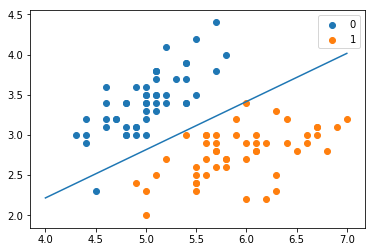

In [66]:
x_ponits = np.arange(4, 8)
# x1 取 x_ponits 时， x2 的值
y_ = -(lr_clf.weights[1]*x_ponits + lr_clf.weights[0])/lr_clf.weights[2]
plt.plot(x_ponits, y_)

#lr_clf.show_graph()
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()